In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from keras.utils import np_utils  

In [29]:
def load_mnist(path, kind='train'):

    labels_path = str(path+'/{}-labels.idx1-ubyte'.format(kind))
    images_path = str(path+'/{}-images.idx3-ubyte'.format(kind))

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
        
    return images, labels

In [30]:
# show the number image
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')
    plt.show()  

In [31]:
# show the image and the label
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
 
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [32]:
# read the data in the path
datapath = "C:/Users/user/Desktop/MNIST dataset"
X_train, Y_train = load_mnist(path=datapath)
X_test, Y_test = load_mnist(path=datapath, kind="t10k")

# reshape data to number of data * pixel28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


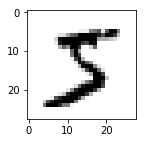

In [33]:
plot_image(X_train[0])

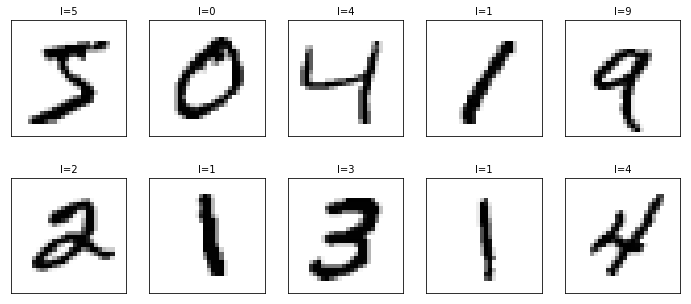

In [34]:
plot_images_labels_predict(X_train, Y_train, [], 0, 10)

In [47]:
# Data pre-processing
# Normalization  
X_train_norm = X_train.reshape(X_train.shape[0], 28, 28,1)/255
X_test_norm = X_test.reshape(X_test.shape[0], 28, 28,1)/255

# Label Onehot encoding  
Y_trainOneHot = np_utils.to_categorical(Y_train)
Y_testOneHot = np_utils.to_categorical(Y_test)

In [36]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',     
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# # Add Dropout layer
# model.add(Dropout(0.25)) 

model.add(Flatten())  

In [37]:
model.add(Dense(128, activation='relu'))  
# model.add(Dropout(0.5)) 

model.add(Dense(10, activation='softmax'))  
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1764)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               225920    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total para

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
train_history = model.fit(x=X_train_norm,  
                          y=Y_trainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
54s - loss: 0.3782 - acc: 0.8997 - val_loss: 0.1061 - val_acc: 0.9690
Epoch 2/10
54s - loss: 0.0816 - acc: 0.9755 - val_loss: 0.0729 - val_acc: 0.9771
Epoch 3/10
53s - loss: 0.0573 - acc: 0.9822 - val_loss: 0.0623 - val_acc: 0.9809
Epoch 4/10
54s - loss: 0.0453 - acc: 0.9860 - val_loss: 0.0529 - val_acc: 0.9847
Epoch 5/10
55s - loss: 0.0354 - acc: 0.9894 - val_loss: 0.0411 - val_acc: 0.9875
Epoch 6/10
55s - loss: 0.0289 - acc: 0.9910 - val_loss: 0.0434 - val_acc: 0.9863
Epoch 7/10
53s - loss: 0.0242 - acc: 0.9925 - val_loss: 0.0457 - val_acc: 0.9858
Epoch 8/10
53s - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0373 - val_acc: 0.9884
Epoch 9/10
52s - loss: 0.0171 - acc: 0.9947 - val_loss: 0.0327 - val_acc: 0.9895
Epoch 10/10
56s - loss: 0.0163 - acc: 0.9947 - val_loss: 0.0382 - val_acc: 0.9885


In [39]:
model.save("MNIST.h5")

In [40]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

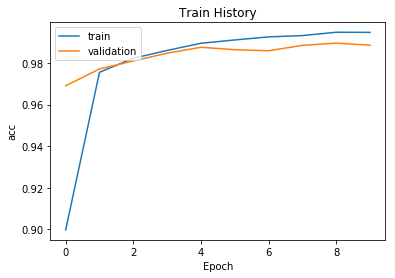

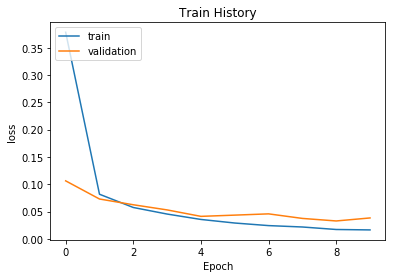

In [41]:
show_train_history(train_history, 'acc', 'val_acc')  
show_train_history(train_history, 'loss', 'val_loss') 

In [44]:
scores = model.evaluate(X_train_norm, Y_trainOneHot)  
print()
print(scores)

59936/60000 [============================>.] - ETA: 0s
[0.01803215854313894, 0.99450000000000005]


In [48]:
print("Making prediction of X_test_norm")  
prediction = model.predict_classes(X_test_norm)  # Making prediction and save result to prediction  
print()  
print("Show 10 prediction result :")  
print(prediction[:10])

Making prediction of X_test_norm
 9888/10000 [============================>.] - ETA: 0s
Show 10 prediction result :
[7 2 1 0 4 1 4 9 5 9]


In [ ]:
plot_images_labels_predict(X_test, Y_test, prediction, idx=10)  

In [53]:
import pandas as pd  
print("Display Confusion Matrix:")  
print(pd.crosstab(Y_test, prediction, rownames=['label'], colnames=['predict']))  

Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        979     0     0     1    0    0    0     0    0    0
1          0  1134     1     0    0    0    0     0    0    0
2          4     4  1014     1    2    0    0     3    4    0
3          0     0     0  1005    0    4    0     0    1    0
4          0     1     0     0  979    0    0     0    0    2
5          2     0     0     6    0  883    1     0    0    0
6          7     2     0     0    2    6  940     0    1    0
7          0     5     3     4    0    0    0  1009    1    6
8          5     1     1     2    1    1    0     1  958    4
9          4     3     0     0    4    3    0     0    0  995


In [63]:
train_history.history

{'acc': [0.89972916478291154,
  0.97547917962074282,
  0.98222918175160889,
  0.98597918003797536,
  0.98943751007318492,
  0.99102084189653394,
  0.99250000715255737,
  0.99312500655651093,
  0.99472917169332509,
  0.99466667175292967],
 'loss': [0.37824280043132602,
  0.081615864299237728,
  0.057344399963039902,
  0.045316030655521901,
  0.035444980580359699,
  0.028897706913994625,
  0.024179183281376027,
  0.021629050902265589,
  0.017055632514529861,
  0.016278261245315662],
 'val_acc': [0.96900000423192978,
  0.9770833417773247,
  0.98091668188571934,
  0.98466667830944066,
  0.98750001043081281,
  0.98633334487676616,
  0.98583334535360334,
  0.988416676223278,
  0.9895000085234642,
  0.98850000947713856],
 'val_loss': [0.10611335607245564,
  0.072877579275518661,
  0.06234686572570354,
  0.052912414609454575,
  0.041095560882240534,
  0.043363586382474749,
  0.045673670410178599,
  0.037329649308230725,
  0.032669319573324175,
  0.03819351013517007]}